<a href="https://colab.research.google.com/github/TSeekasamit/DS-and-ML/blob/master/Loan%20Prediction%20III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd '/content/drive/My Drive/Project ML Final'

/content/drive/My Drive/Project ML Final


In [0]:
pwd

'/content/drive/My Drive/Project ML Final'

In [0]:
ls

 catboost_info/                 'Project ML.ipynb'
'Dummmy ML.ipynb'                __pycache__/
'Lecture 9 - Imbalanced.ipynb'   sample_submission.csv
 metrix_all.csv                  submission.csv
 minisom.py                      test_data.csv
'Project DS 62199130233.ipynb'   train_data.csv


#<font color='Blue'>**Project Owner**
*   Teerawit Seekasamit 62199130233
</font>
---



#<font color='orange'>**Problem Statement : Loan Prediction III**</font>

---


Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#<font color='green'>**1. Data Preparation**</font>

---

##<font color='purple'>1.1 Importing modules </font>

---



In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler # Data Standardization [-1,1]
from sklearn.preprocessing import MinMaxScaler # Data Normalization [0,1]
from sklearn.preprocessing import RobustScaler # can ignore outlier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

##<font color='purple'>1.2 Loading the Dataset</font>
---



In [0]:
df = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

#<font color='green'>**2. Data Understanding**</font>
---
<font color='blue'>**Loan_Status**(Y/N) => Binary Classification Problem </font> </br>

**Variable** : Description

**Loan_ID** : Unique Loan ID

**Gender** : Male/ Female

**Married** : Applicant married (Y/N)

**Dependents** : Number of dependents (จำนวนบุตร)

**Education** : Applicant Education (Graduate/ Under Graduate)

**Self_Employed** : Self employed (Y/N)

**ApplicantIncome** : Applicant income

**CoapplicantIncome** : Coapplicant income

**LoanAmount** : Loan amount in thousands (วงเงินกู้)

**Loan_Amount_Term** : Term of loan in months (ระยะเวลาเงินกู้)

**Credit_History** : credit history meets guidelines

**Property_Area** : Urban/ Semi Urban/ Rural

**Loan_Status** : Loan approved (Y/N)

**Train Dataset** : 614 rows and 13 columns

**Test Dataset** : 367 rows and 12 columns (without target attribute 'Loan_Status')


##<font color='purple'>2.1 Featuer Analysis</font>
---
For Train Data :

Categorical features: Gender, Married, Self_Employed, Credit_History, Loan_Status

Ordinal features: Dependents, Education, Property_Area

Numerical features: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [0]:
df.dtypes, df_test.dtypes, df.shape, df_test.shape

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object, Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 dtype: object, (614, 13), (367, 12))

In [0]:
df.describe(include='number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002776,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [0]:
numberic_cols = df.select_dtypes(include=['number']).columns
print(numberic_cols)
df[numberic_cols].head(5)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [0]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
df[categorical_cols].head(5)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [0]:
#List Columns
[x for x in df.columns]

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

##<font color='purple'>2.2 Imbalanced data</font>
---
Degree of this imbalanced data is Mild. 
</br>Ref : [link](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)


In [0]:
#Check imbalanced data
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

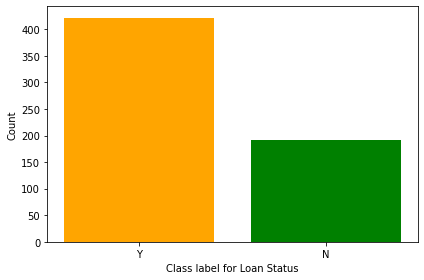

In [0]:
plt.bar(df['Loan_Status'].value_counts(dropna=False).index.tolist(),
        df['Loan_Status'].value_counts(dropna=False).values.tolist(),
        color=['orange', 'green'])

plt.ylabel('Count')
plt.xlabel('Class label for Loan Status')
plt.tight_layout()

##<font color='purple'>2.3 Missing Data</font>
---

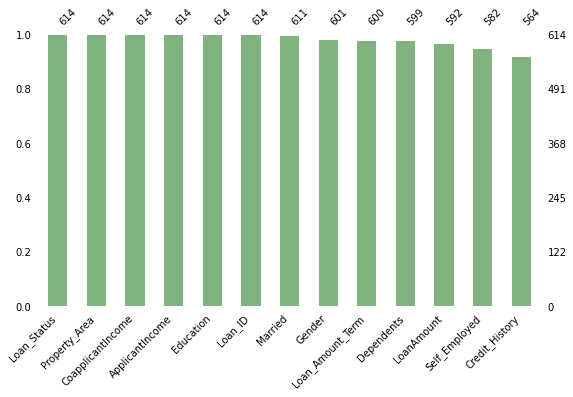

In [0]:
import missingno as msno
msno.bar(msno.nullity_filter(df, filter='bottom', n=len(df)),figsize=(9,5),color=(0.5, 0.7, 0.5),fontsize=(10),sort='descending')
plt.show()

In [0]:
# all count
print(df.isnull().sum().sum())

#each count
print(df.isnull().sum().sort_values(ascending = False))

#list columns
print(df.isnull().any())

# list rows
df[df.isnull().any(axis=1)==True].index

149
Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64
Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool


Int64Index([  0,  11,  16,  19,  23,  24,  29,  30,  35,  36,
            ...
            571, 576, 579, 583, 588, 592, 597, 600, 601, 605],
           dtype='int64', length=134)

In [0]:
#'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History' => have missing values
df.columns[df.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

#<font color='green'>**3. Data Preprocessing**</font>
---

##<font color='purple'>3.1 Data Cleansing</font>
---

In [0]:
#Convert data from int to float
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
#df2['Credit_History'] = df2['Credit_History'].astype(int)

In [0]:
#Replace empty/null/others values with "NaN"
df = df.replace(to_replace=[r'^\s*$', r'[?]', r'\'\s*\'', 'N/A', 'None'], value=np.nan, regex=True)

##<font color='purple'>3.2 Missing Value Treatment</font>

In [0]:
def my_fillMode(colName):
  print("Impute missing values for", colName ,"=>", df[colName].dropna().mode().values[0])
  df[colName] = df[colName].fillna(df[colName].dropna().mode().values[0])

In [0]:
def my_fillMedian(colName):
  print("Impute missing values for", colName ,"=>", df[colName].dropna().median)
  df[colName] = df[colName].fillna(df[colName].dropna().median())

In [0]:
#'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History' => have missing values
my_fillMode('Gender')
my_fillMode('Married')
my_fillMode('Dependents')
my_fillMode('Self_Employed')
my_fillMode('Loan_Amount_Term')
my_fillMode('Credit_History')
my_fillMedian('LoanAmount')

Impute missing values for Gender => Male
Impute missing values for Married => Yes
Impute missing values for Dependents => 0
Impute missing values for Self_Employed => No
Impute missing values for Loan_Amount_Term => 360.0
Impute missing values for Credit_History => 1.0
Impute missing values for LoanAmount => <bound method Series.median of 1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 592, dtype: float64>


In [0]:
#Dodble check missing values
print(df.isnull().sum().sum())

0


#<font color='green'>**4. Data Exploration**</font>

---



##<font color='purple'>4.1 EDA with Loan Status</font>

Loan_Status
Loan_Status Credit_History             
N           0.0                      82
            1.0                     110
Y           0.0                       7
            1.0                     415

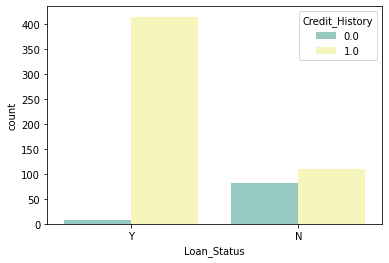

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Credit_History", data=df, palette="Set3")
df.groupby(['Loan_Status','Credit_History']).agg({'Loan_Status':'count'})
#Most good credit history have approved

Loan_Status
Loan_Status Property_Area             
N           Rural                   69
            Semiurban               54
            Urban                   69
Y           Rural                  110
            Semiurban              179
            Urban                  133

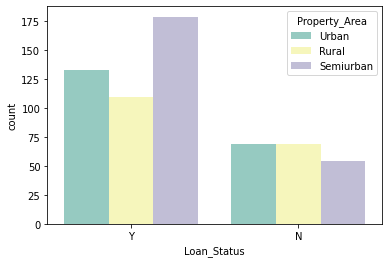

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Property_Area", data=df, palette="Set3")
df.groupby(['Loan_Status','Property_Area']).agg({'Loan_Status':'count'})
'''
จากกราฟแสดงการอนุมัติการกู้และพื้นที่ในเมือง ชานเมืองหรือชนบท
โดย
คนที่กู้ไม่ผ่าน:
- ในเมืองมี 69 คน
- ชานเมือง 54 คน
- ชนบท 69 คน
คนที่กู้ผ่าน:
- ในเมืองมี 110 คน
- ชานเมือง 179 คน
- ชนบท 133 คน
จะเห็นว่าคนที่กู้ผ่านมีเยอะกว่า และมีพื้นที่ในชานเมืองมีการอนุมัติเงินกู้สูงสุด
'''

Loan_Status
Loan_Status Self_Employed             
N           No                     166
            Yes                     26
Y           No                     366
            Yes                     56

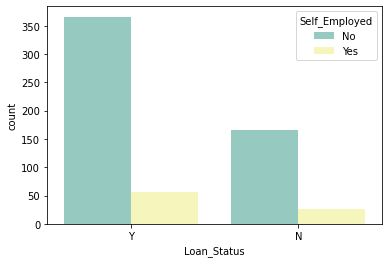

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Self_Employed", data=df, palette="Set3")
df.groupby(['Loan_Status','Self_Employed']).agg({'Loan_Status':'count'})
#Most employees have approved

Loan_Status
Loan_Status Education                
N           Graduate              140
            Not Graduate           52
Y           Graduate              340
            Not Graduate           82

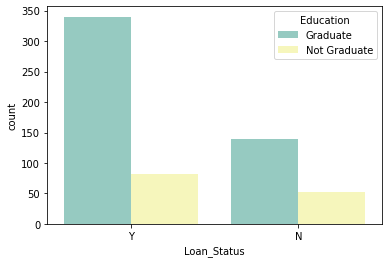

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Education", data=df, palette="Set3")
df.groupby(['Loan_Status','Education']).agg({'Loan_Status':'count'})
#Most graduated person have approved

Loan_Status
Loan_Status Dependents             
N           0                   113
            1                    36
            2                    25
            3+                   18
Y           0                   247
            1                    66
            2                    76
            3+                   33

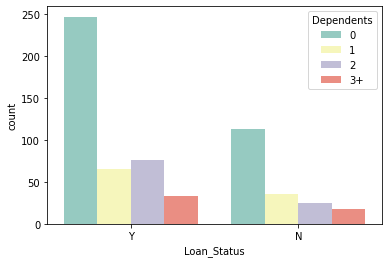

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Dependents", data=df, palette="Set3")
df.groupby(['Loan_Status','Dependents']).agg({'Loan_Status':'count'})
#peopel who have zero with dependent, would have been approved

Loan_Status
Loan_Status Married             
N           No                79
            Yes              113
Y           No               134
            Yes              288

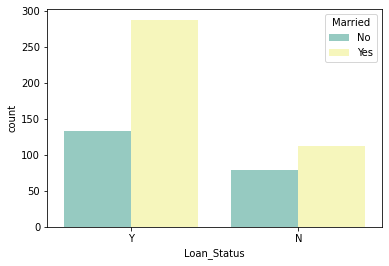

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Married", data=df, palette="Set3")
df.groupby(['Loan_Status','Married']).agg({'Loan_Status':'count'})

Loan_Status
Loan_Status Gender             
N           Female           37
            Male            155
Y           Female           75
            Male            347

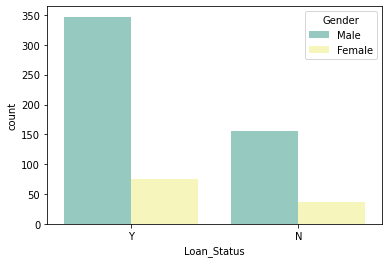

In [0]:
ax = sns.countplot(x="Loan_Status", hue="Gender", data=df, palette="Set3")
df.groupby(['Loan_Status','Gender']).agg({'Loan_Status':'count'})
#Most men have approved

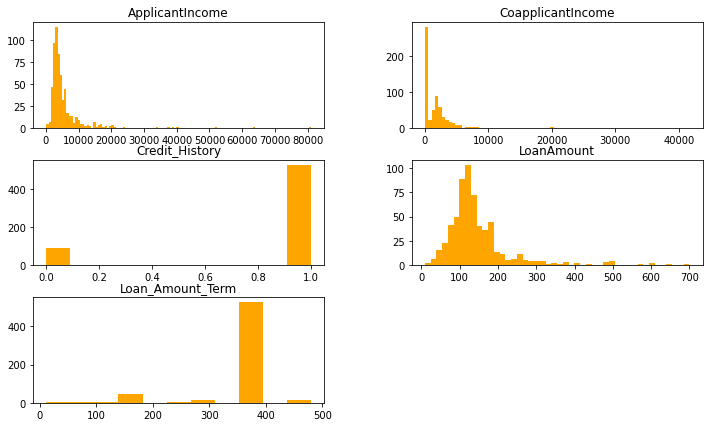

In [0]:
df.hist(bins="auto", figsize=(12,7), color="orange", grid=False);

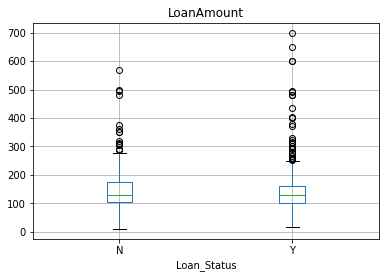

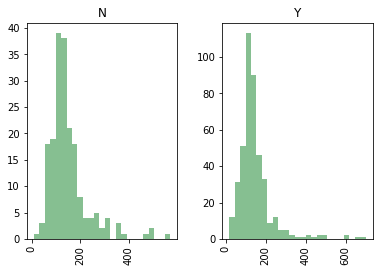

In [0]:
df.boxplot(column="LoanAmount",by="Loan_Status")
plt.suptitle("")
plt.show()
df.hist(column='LoanAmount', by='Loan_Status', bins=25, grid=True,color='#86bf91')
plt.show()


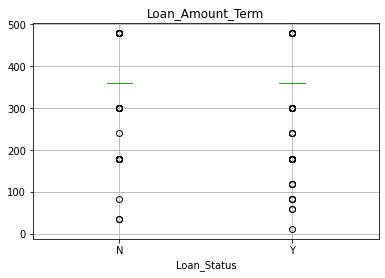

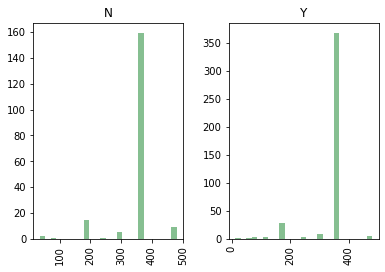

In [0]:
df.boxplot(column="Loan_Amount_Term",by="Loan_Status")
plt.suptitle("")
plt.show()
df.hist(column='Loan_Amount_Term', by='Loan_Status', bins=25, grid=True,color='#86bf91')
plt.show()

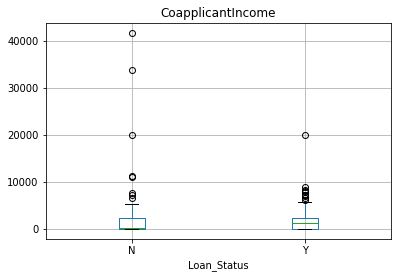

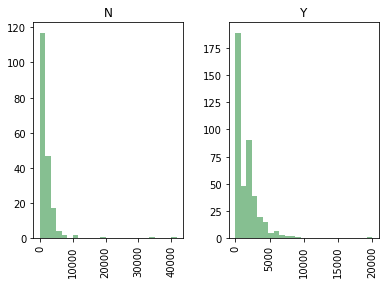

In [0]:
df.boxplot(column="CoapplicantIncome",by="Loan_Status")
plt.suptitle("")
plt.show()
df.hist(column='CoapplicantIncome', by='Loan_Status', bins=25, grid=True,color='#86bf91')
plt.show()

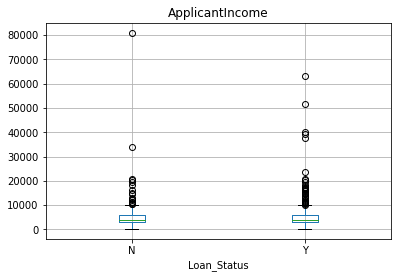

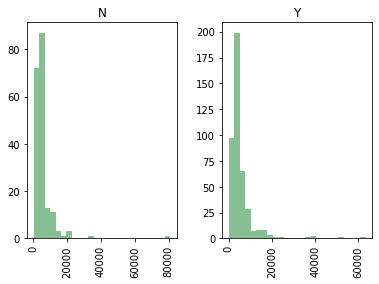

In [0]:
df.boxplot(column="ApplicantIncome",by="Loan_Status")
plt.suptitle("")
plt.show()
df.hist(column='ApplicantIncome', by='Loan_Status', bins=25, grid=True,color='#86bf91')
plt.show()

##<font color='purple'>4.2 EDA with Applicant Income</font>

---

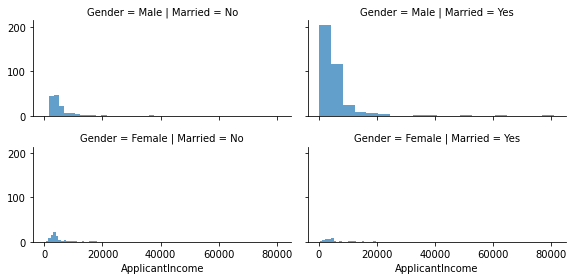

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Married', size=2, aspect=2)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.7, bins=20)
grid.add_legend()
plt.show()
#Males with married => high-income

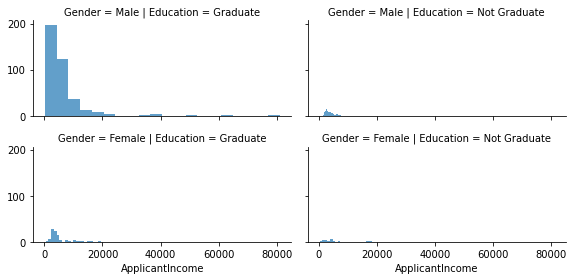

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2, aspect=2)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.7, bins=20)
grid.add_legend()
plt.show()
#A graduate who is a male => high-income

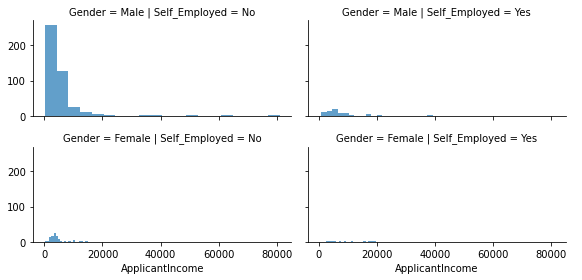

In [0]:
grid = sns.FacetGrid(df, row='Gender', col='Self_Employed', size=2, aspect=2)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.7, bins=20)
grid.add_legend()
plt.show()
#men employee => high-income

##<font color='purple'>4.3 EDA with HeatMap</font>

---

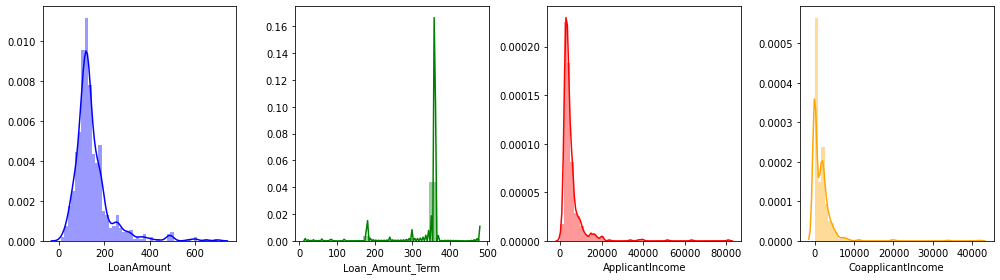

In [0]:
flg, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (14,4))

sns.distplot(df['LoanAmount'], color="blue", ax=axes[0])
sns.distplot(df['Loan_Amount_Term'], color="green", ax=axes[1])
sns.distplot(df['ApplicantIncome'], color="red", ax = axes[2])
sns.distplot(df['CoapplicantIncome'], color="orange", ax=axes[3])

plt.tight_layout()
plt.show()

In [0]:
#Convert Y/N to 1/0 for Loan_Status to visualize the correlation
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
#Double Check
df['Loan_Status'].value_counts(dropna=False)

1    422
0    192
Name: Loan_Status, dtype: int64

<font color='green'>The most correlated feature : Focus on Green color


*   Application Income - Loan Amount 0.57
*   Credit History - Loan Status 0.54
*   Loan Amount - Co-Application Income : 0.19</font>



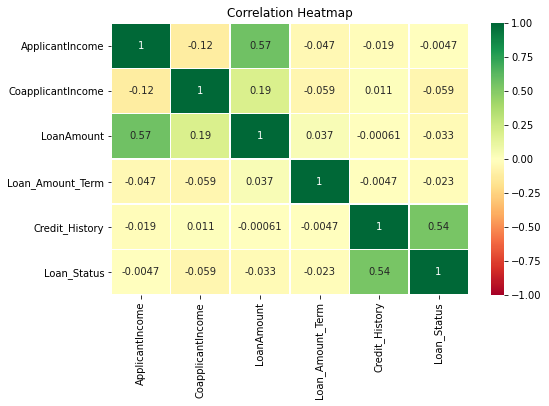

In [0]:
import seaborn as sns
plt.figure(figsize=(8,5))

ax = sns.heatmap(df.corr(), linewidth=0.5, vmin=-1,cmap='RdYlGn', annot=True)

plt.title('Correlation Heatmap')
plt.show()

##<font color='purple'>4.4 EDA with Noisy Data</font>

---

In [0]:
f_outlier = 'ApplicantIncome'

q1= df[f_outlier].quantile(0.25)
q3 = df[f_outlier].quantile(0.75)
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print('q1 = {}'.format(q1))
print('q3 = {}'.format(q3))
print('iqr = {}'.format(iqr))
print('lower bound = {}, upper bound = {}'.format(lower_bound, upper_bound))
outlier_row_indice = df[(df[f_outlier] < lower_bound) | (df[f_outlier]>upper_bound)].index
print('number of outliers = {}'.format(len(outlier_row_indice)))
print('indices of outliers = ', outlier_row_indice.to_list())

q1 = 2877.5
q3 = 5795.0
iqr = 2917.5
lower bound = -1498.75, upper bound = 10171.25
number of outliers = 50
indices of outliers =  [9, 34, 54, 67, 102, 106, 115, 119, 126, 128, 130, 138, 144, 146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308, 324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483, 487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604]


In [0]:
f_outlier = 'CoapplicantIncome'

q1= df[f_outlier].quantile(0.25)
q3 = df[f_outlier].quantile(0.75)
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print('q1 = {}'.format(q1))
print('q3 = {}'.format(q3))
print('iqr = {}'.format(iqr))
print('lower bound = {}, upper bound = {}'.format(lower_bound, upper_bound))
outlier_row_indice = df[(df[f_outlier] < lower_bound) | (df[f_outlier]>upper_bound)].index
print('number of outliers = {}'.format(len(outlier_row_indice)))
print('indices of outliers = ', outlier_row_indice.to_list())

q1 = 0.0
q3 = 2297.25
iqr = 2297.25
lower bound = -3445.875, upper bound = 5743.125
number of outliers = 18
indices of outliers =  [9, 12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 506, 513, 523, 581, 600]


In [0]:
f_outlier = 'LoanAmount'

q1= df[f_outlier].quantile(0.25)
q3 = df[f_outlier].quantile(0.75)
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print('q1 = {}'.format(q1))
print('q3 = {}'.format(q3))
print('iqr = {}'.format(iqr))
print('lower bound = {}, upper bound = {}'.format(lower_bound, upper_bound))
outlier_row_indice = df[(df[f_outlier] < lower_bound) | (df[f_outlier]>upper_bound)].index
print('number of outliers = {}'.format(len(outlier_row_indice)))
print('indices of outliers = ', outlier_row_indice.to_list())

q1 = 100.25
q3 = 164.75
iqr = 64.5
lower bound = 3.5, upper bound = 261.5
number of outliers = 41
indices of outliers =  [5, 9, 21, 34, 54, 67, 83, 126, 130, 135, 155, 161, 171, 177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372, 381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592, 600, 604]


In [0]:
f_outlier = 'Loan_Amount_Term'

q1= df[f_outlier].quantile(0.25)
q3 = df[f_outlier].quantile(0.75)
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print('q1 = {}'.format(q1))
print('q3 = {}'.format(q3))
print('iqr = {}'.format(iqr))
print('lower bound = {}, upper bound = {}'.format(lower_bound, upper_bound))
outlier_row_indice = df[(df[f_outlier] < lower_bound) | (df[f_outlier]>upper_bound)].index
print('number of outliers = {}'.format(len(outlier_row_indice)))
print('indices of outliers = ', outlier_row_indice.to_list())

q1 = 360.0
q3 = 360.0
iqr = 0.0
lower bound = 360.0, upper bound = 360.0
number of outliers = 88
indices of outliers =  [14, 16, 62, 66, 68, 72, 75, 78, 84, 91, 94, 98, 100, 109, 115, 128, 130, 133, 142, 144, 155, 164, 168, 171, 172, 179, 182, 186, 189, 202, 228, 231, 241, 242, 245, 247, 248, 253, 262, 282, 286, 293, 298, 313, 315, 333, 334, 355, 358, 363, 366, 372, 373, 375, 378, 385, 393, 400, 401, 408, 429, 435, 444, 451, 453, 461, 466, 471, 476, 495, 497, 500, 504, 513, 516, 539, 540, 546, 554, 573, 575, 585, 590, 591, 593, 600, 605, 610]


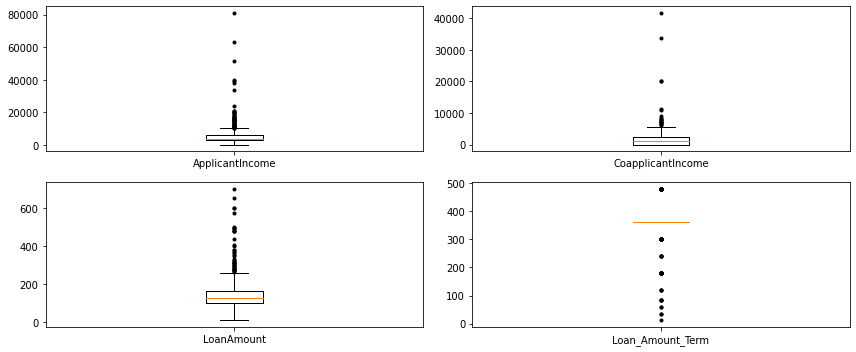

In [0]:
fig, axes = plt.subplots(figsize=(12,5), nrows=2, ncols=2, squeeze=0)

i = 0
for ax, col in zip(axes.reshape(-1), numberic_cols):
    ax.boxplot(df[col], labels=[col], sym='k.')
plt.tight_layout()

In [0]:
import plotly.express as px
fig = px.scatter(df, x='ApplicantIncome', y='LoanAmount', width=800, height=400)
fig.show()

In [0]:
import plotly.express as px
fig = px.scatter(df, x='CoapplicantIncome', y='Loan_Amount_Term', width=800, height=400)
fig.show()

In [0]:
#df.drop(outlier_row_indice, inplace=True)

In [0]:
#check ApplicantIncome > 60000
print(df[df.ApplicantIncome > 60000].index)
len(df[df.ApplicantIncome > 60000].index)

Int64Index([333, 409], dtype='int64')


2

In [0]:
#Check CoapplicantIncome > 40000
print(df[df.CoapplicantIncome > 40000].index)
len(df[df.CoapplicantIncome > 40000].index)

Int64Index([600], dtype='int64')


1

#<font color='green'>**5. Data Transformation**</font>

---


In [0]:
#Make copy after preprocessing
df2 = df.copy()
df2.shape

(614, 13)

##<font color='purple'>5.1 Noisy Treatment</font>

---
Remove ApplicantIncome > 60000 [ 2 samples ]

Remove CoapplicantIncome > 40000 [ 1 sample ]

In [0]:
#use Deleting observations
df2.drop(df2[df2.ApplicantIncome > 60000].index, inplace=True)
df2.drop(df2[df2.CoapplicantIncome > 40000].index, inplace=True)


In [0]:
#df.drop(outlier_row_indice, inplace=True)

##<font color='purple'>5.2 Feature Engineering</font>

---
Data Encoding - Encoding to numeric data

In [0]:
#'Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
def convert2num(y, n, colName):
  df2[colName] = df2[colName].map({y: 1, n: 0})
  

In [0]:
#Gender, Male=1, Female=0
df2['Gender'].value_counts(dropna=False)

Male      500
Female    111
Name: Gender, dtype: int64

In [0]:
#Double Check for Gender
convert2num('Male', 'Female', 'Gender')
df2['Gender'].value_counts(dropna=False)

1    500
0    111
Name: Gender, dtype: int64

In [0]:
#Married, Yes=1, No=0
df2['Married'].value_counts(dropna=False)

Yes    399
No     212
Name: Married, dtype: int64

In [0]:
#Double Check for Married
convert2num('Yes', 'No', 'Married')
df2['Married'].value_counts(dropna=False)

1    399
0    212
Name: Married, dtype: int64

In [0]:
#Dependents, 0=1, 1=1, 2=2, 3+=3
df2['Dependents'].value_counts(dropna=False)

0     359
1     102
2     101
3+     49
Name: Dependents, dtype: int64

In [0]:
#Double Check for Dependents
df2['Dependents'] = df2['Dependents'].map({ '0': 0, '1': '1', '2': 2, '3+': 3})
df2['Dependents'].value_counts(dropna=False)

0    359
1    102
2    101
3     49
Name: Dependents, dtype: int64

In [0]:
#Education, Graduate=1, Not Graduate=0
df2['Education'].value_counts(dropna=False)

Graduate        477
Not Graduate    134
Name: Education, dtype: int64

In [0]:
#Double Check for Education
convert2num('Graduate', 'Not Graduate', 'Education')
df2['Education'].value_counts(dropna=False)

1    477
0    134
Name: Education, dtype: int64

In [0]:
#Self_Employed, No=0, Yes=1
df2['Self_Employed'].value_counts(dropna=False)

No     529
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
#Double Check for Self_Employed
convert2num('Yes', 'No', 'Self_Employed')
df2['Self_Employed'].value_counts(dropna=False)

0    529
1     82
Name: Self_Employed, dtype: int64

In [0]:
#Property_Area, Semiurban=1, Urban=2, Rural=3
df2['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        200
Rural        178
Name: Property_Area, dtype: int64

In [0]:
#Double Check for Property_Area
df2['Property_Area'] = df2['Property_Area'].map({ 'Semiurban': '1', 'Urban': 2, 'Rural': 3})
df2['Property_Area'].value_counts(dropna=False)

1    233
2    200
3    178
Name: Property_Area, dtype: int64

In [0]:
df2.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1


In [0]:
df2.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [0]:
#Convert data from object to int
df2['Dependents'] = df2['Dependents'].astype(int)
df2['Property_Area'] = df2['Property_Area'].astype(int)

In [0]:
df2.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

##<font color='purple'>5.3 Correletion HeatMap after treatment
</font>

---

<font color='green'>The most correlated feature : Focus on Green color


*   Application Income - Loan Amount 0.6
*   Credit History - Loan Status 0.54
*   Gender - Married : 0.36
*   Dependents - Married : 0.34
</font>

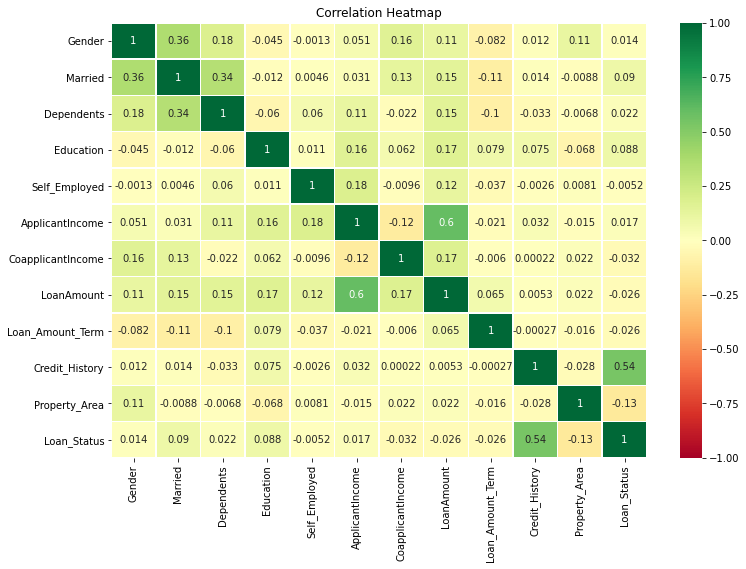

In [0]:
import seaborn as sns
plt.figure(figsize=(12,8))

ax = sns.heatmap(df2.corr(), linewidth=0.5, vmin=-1,cmap='RdYlGn', annot=True)

plt.title('Correlation Heatmap')
plt.show()

# <font color='green'>**6. Spliting Train and Test set**</font>

In [0]:
#Make copy after transforming data
df3 = df2.copy()
df3.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1


In [0]:
#df3.drop('Loan_ID',axis=1,inplace=True)
X = df3.drop(['Loan_ID','Loan_Status'],axis=1)
#X = df3[['ApplicantIncome','LoanAmount','Credit_History']]
y = df3['Loan_Status']
#X = df3.iloc[:, 1:-1]
#y = df3.iloc[:, -1]


In [0]:
X.shape, y.shape

((611, 11), (611,))

##<font color='purple'>6.1 Try Resampling Imbalanced Data</font>

---
Y    422
N    192

###6.2.1 Up-sample Minority Class

In [0]:
'''
XX = pd.concat([X, y], axis=1)

df_majority = XX[XX.Loan_Status==1]
df_minority = XX[XX.Loan_Status==0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1000)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.Loan_Status.value_counts())

X = df_upsampled.drop(['Loan_Status'], axis=1)
y = df_upsampled['Loan_Status']
'''

"\nXX = pd.concat([X, y], axis=1)\n\ndf_majority = XX[XX.Loan_Status==1]\ndf_minority = XX[XX.Loan_Status==0]\n\ndf_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1000)\n\ndf_upsampled = pd.concat([df_majority, df_minority_upsampled])\n\nprint(df_upsampled.Loan_Status.value_counts())\n\nX = df_upsampled.drop(['Loan_Status'], axis=1)\ny = df_upsampled['Loan_Status']\n"

###6.2.2 Down-sample Majority Class

In [0]:
'''
XX = pd.concat([X, y], axis=1)

df_majority = XX[XX.Loan_Status==1]
df_minority = XX[XX.Loan_Status==0]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1000)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print(df_downsampled.Loan_Status.value_counts())

X = df_downsampled.drop(['Loan_Status'], axis=1)
y = df_downsampled['Loan_Status']
'''

"\nXX = pd.concat([X, y], axis=1)\n\ndf_majority = XX[XX.Loan_Status==1]\ndf_minority = XX[XX.Loan_Status==0]\n\ndf_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1000)\n\ndf_downsampled = pd.concat([df_majority_downsampled, df_minority])\n\nprint(df_downsampled.Loan_Status.value_counts())\n\nX = df_downsampled.drop(['Loan_Status'], axis=1)\ny = df_downsampled['Loan_Status']\n"

##<font color='purple'>6.2 Try Data Scaling</font>

---
Feature Scaling

*   MinMaxScaler - Data Normalization [0,1]
*   StandardScaler - Data Standardization [-1,1]
*   RobustScaler - can ignore outlier data



In [0]:
#sc = MinMaxScaler(feature_range = (0, 1))
#sc = StandardScaler()
#sc = RobustScaler()
#X = sc.fit_transform(X)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1000)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((458, 11), (458,), (153, 11), (153,))

# <font color='green'>**7. Building Classification Mode**l</font>

---



##<font color='purple'>7.1 Logistic Regression</font>

---

In [0]:
#Logistic regression
from sklearn import metrics
#mymodel_lgr = LogisticRegression(penalty= 'l2', class_weight='balanced')
#mymodel_lgr = LogisticRegression(penalty= 'l1', solver= 'liblinear', random_state = 2019, class_weight='balanced')
mymodel_lgr = LogisticRegression(solver='lbfgs', max_iter=1000) #0.7922
#mymodel_lgr = LogisticRegression(penalty='l2', C=0.2) #0.78472
#mymodel_clf = LogisticRegression(class_weight='balanced') #0.78472
mymodel_lgr.fit(X_train, y_train)
y_pred = mymodel_lgr.predict(X_test)

######################################################

#Performace with confusion metrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for : Logistic regression")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for : Logistic regression

 Accuracy = 76.47058823529412 %

 Precision = 75.93984962406014 %

 Recall = 96.19047619047619 %

 f1 = 84.87394957983192 %


**Create DF for Metrics Models**

This section, AUC used by roc_auc_score()

In [0]:
metrix_all = pd.DataFrame(columns=['My Modeling','Accuracy','Precision','Recall','F1','AUC Score'])

In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_lgr.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc }, ignore_index=True)
#metrix_all

##<font color='purple'>7.2 K-Nearest Neighbors</font>

---

In [0]:
#K-Nearest Neighbors

mymodel_knn = KNeighborsClassifier(n_neighbors=7)
mymodel_knn.fit(X_train, y_train)
y_pred = mymodel_knn.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for K-Nearest Neighbors :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for K-Nearest Neighbors :

 Accuracy = 65.359477124183 %

 Precision = 68.57142857142857 %

 Recall = 91.42857142857143 %

 f1 = 78.36734693877551 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_knn.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

##<font color='purple'>7.3 Random Forest Classifier</font>

---

In [0]:
#Random Forest Classifier : Acc 77.27/77.92 precision 77.51 recall 94.33 f1 85.10

mymodel_rfc = RandomForestClassifier(n_estimators=100)
mymodel_rfc.fit(X_train, y_train)
y_pred = mymodel_rfc.predict(X_test)

######################################################

#Performace with confusion metrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for Random Forest Classifier:")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Random Forest Classifier:

 Accuracy = 73.20261437908496 %

 Precision = 75.0 %

 Recall = 91.42857142857143 %

 f1 = 82.40343347639487 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_rfc.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

In [0]:
#feature_imp = pd.Series(mymodel_rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
#feature_imp

##<font color='purple'>7.4 Neural Network</font>

---

In [0]:
#Neural Network

mymodel_nn = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu',solver='adam', max_iter=500)
mymodel_nn.fit(X_train, y_train)

y_pred = mymodel_nn.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for Neural Network :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Neural Network :

 Accuracy = 65.359477124183 %

 Precision = 70.0 %

 Recall = 86.66666666666667 %

 f1 = 77.4468085106383 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_nn.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

##<font color='purple'>7.5 Decision Tree</font>

---

In [0]:
#Decision Tree

#mymodel_dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=3, min_samples_leaf=5)

mymodel_dtree = DecisionTreeClassifier()
mymodel_dtree.fit(X_train, y_train)
y_pred = mymodel_dtree.predict(X_test)
######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for Decision Tree :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Decision Tree :

 Accuracy = 65.359477124183 %

 Precision = 73.21428571428571 %

 Recall = 78.0952380952381 %

 f1 = 75.57603686635944 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_dtree.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

##<font color='purple'>7.6 Gradient Boosting</font>

---

In [0]:
#Gradient Boosting

mymodel_gdb = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = mymodel_gdb.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for Gradient Boosting :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Gradient Boosting :

 Accuracy = 73.8562091503268 %

 Precision = 74.80916030534351 %

 Recall = 93.33333333333333 %

 f1 = 83.05084745762711 %


In [0]:
#Confusion Matrix
matrix_gdb = confusion_matrix(y_test, y_pred)
matrix_gdb

array([[15, 33],
       [ 7, 98]])

In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_gdb.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

##<font color='purple'>7.7 Naïve Bayes</font>

---

In [0]:
# Naïve Bayes

mymodel_nvb = GaussianNB()
mymodel_nvb.fit(X_train, y_train)
y_pred = mymodel_nvb.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for Naïve Bayes :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Naïve Bayes :

 Accuracy = 77.12418300653596 %

 Precision = 76.11940298507463 %

 Recall = 97.14285714285714 %

 f1 = 85.35564853556487 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_nvb.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

##<font color='purple'>7.8 Support Vector Machine</font>

---

In [0]:
#Support Vector Machine

#mymodel_svm = svm.SVC(kernel='rbf', tol=0.01) #Non-linear 
mymodel_svm = svm.SVC(probability=True, kernel='rbf', random_state=0, gamma=.10, C=1.0)
mymodel_svm.fit(X_train, y_train)
y_pred = mymodel_svm.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for Support Vector Machines :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Support Vector Machines :

 Accuracy = 68.62745098039215 %

 Precision = 68.62745098039215 %

 Recall = 100.0 %

 f1 = 81.3953488372093 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_svm.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

##<font color='purple'>7.9 XGBoosting</font>

---

In [0]:
# XGBoosting
mymodel_xgb = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = mymodel_xgb.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Performance for XGBoosting :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for XGBoosting :

 Accuracy = 73.8562091503268 %

 Precision = 74.43609022556392 %

 Recall = 94.28571428571428 %

 f1 = 83.19327731092436 %


In [0]:
metrix_all = metrix_all.append({'My Modeling':mymodel_xgb.__class__.__name__,
                                'Accuracy':accuracy,
                                'Precision':precision,
                                'Recall':recall,
                                'F1':f1,'AUC Score':auc  }, ignore_index=True)
#metrix_all

In [0]:
'''
#!pip install catboost
#https://catboost.ai/docs/concepts/python-usages-examples.html#multiclassification
from catboost import CatBoostClassifier

#Binary classification

cat_features = [0, 1]
#mymodel_cat = CatBoostClassifier(iterations=2,learning_rate=1,depth=2).fit(X_train, y_train)
mymodel_cat = CatBoostClassifier(iterations=1000, devices='0:1').fit(X_train, y_train, verbose=False)
y_pred = mymodel_cat.predict(X_test)

######################################################

#Performace with confusion metrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance for XGBoosting :")
print("\n Accuracy = " + str(accuracy*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')
print("\n ROC AUC Scoring = " + str((roc_auc_score(y_test, y_pred)*100)),'%')
'''

'\n#!pip install catboost\n#https://catboost.ai/docs/concepts/python-usages-examples.html#multiclassification\nfrom catboost import CatBoostClassifier\n\n#Binary classification\n\ncat_features = [0, 1]\n#mymodel_cat = CatBoostClassifier(iterations=2,learning_rate=1,depth=2).fit(X_train, y_train)\nmymodel_cat = CatBoostClassifier(iterations=1000, devices=\'0:1\').fit(X_train, y_train, verbose=False)\ny_pred = mymodel_cat.predict(X_test)\n\n######################################################\n\n#Performace with confusion metrix\n\naccuracy = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test, y_pred)\nrecall = recall_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred)\n\nprint("Performance for XGBoosting :")\nprint("\n Accuracy = " + str(accuracy*100), \'%\')\nprint("\n Precision = " + str(precision*100),\'%\')\nprint("\n Recall = " + str(recall*100),\'%\')\nprint("\n f1 = " + str(f1*100),\'%\')\nprint("\n ROC AUC Scoring = " + str((roc_auc_score(y_test, y_pred)*100))

##<font color='purple'>7.10 Comparing the Predictive Performance</font>
---



In [0]:
metrix_all.set_index('My Modeling', inplace=True)
metrix_all.sort_values(by=['Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1,AUC Score
My Modeling,,,,,
GaussianNB,0.771242,0.761194,0.971429,0.853556,0.652381
LogisticRegression,0.764706,0.759398,0.961905,0.848739,0.647619
GradientBoostingClassifier,0.738562,0.748092,0.933333,0.830508,0.622917
XGBClassifier,0.738562,0.744361,0.942857,0.831933,0.617262
RandomForestClassifier,0.732026,0.750000,0.914286,0.824034,0.623810
SVC,0.686275,0.686275,1.000000,0.813953,0.500000
KNeighborsClassifier,0.653595,0.685714,0.914286,0.783673,0.498810
MLPClassifier,0.653595,0.700000,0.866667,0.774468,0.527083
DecisionTreeClassifier,0.653595,0.732143,0.780952,0.755760,0.577976


In [0]:
metrix_all.to_csv(r'metrix_all.csv')

##<font color='purple'>7.10 Multiple ROC Curves</font>
---
This section, AUC used by auc(fpr, tpr) with predict_proba

<font color='red'>Don't forget to add parameter SVC(probability=True) to be able to run this section to avoid a problem</font>

In [0]:
mymodel_all = [mymodel_lgr, mymodel_knn, mymodel_rfc, mymodel_nn, mymodel_dtree,
               mymodel_gdb, mymodel_nvb, mymodel_svm, mymodel_xgb]

result_table = pd.DataFrame(columns=['mymodel_all', 'fpr','tpr','auc'])

for cls in mymodel_all:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = metrics.auc(fpr, tpr)
    #auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'mymodel_all':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        }, ignore_index=True)

result_table.set_index('mymodel_all', inplace=True)

In [0]:
result_sort = result_table.sort_values(by=['auc'], ascending=False)
result_sort['auc']

mymodel_all
LogisticRegression            0.715675
GaussianNB                    0.690873
RandomForestClassifier        0.674008
XGBClassifier                 0.668849
GradientBoostingClassifier    0.649603
DecisionTreeClassifier        0.597917
SVC                           0.534524
MLPClassifier                 0.508333
KNeighborsClassifier          0.505456
Name: auc, dtype: float64

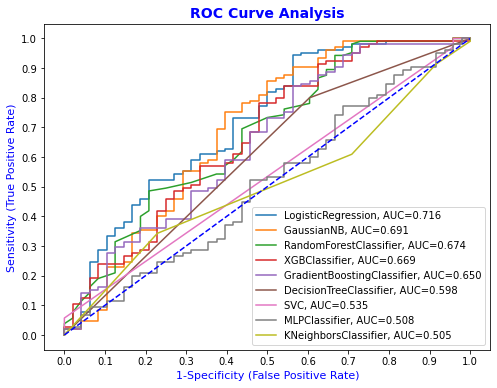

In [0]:
fig = plt.figure(figsize=(8,6))

for i in result_sort.index:
    plt.plot(result_sort.loc[i]['fpr'], 
             result_sort.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_sort.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='blue', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("1-Specificity (False Positive Rate)", fontsize=11, color='Blue')

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Sensitivity (True Positive Rate)", fontsize=11, color='Blue')

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14, color='Blue')
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

##<font color='purple'>7.11 Stratified K-fold Cross-Validation</font>
---
Evaluate a score by Stratified K-Folds cross-validator

In [0]:
skf = StratifiedKFold(shuffle=True, n_splits=5)

accuracy = cross_val_score(estimator=mymodel_lgr, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Logistic regression :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_knn, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for K-Nearest Neighbors :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_rfc, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Random Forest :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_nn, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Neural Networks :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_dtree, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Decision Tree :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_gdb, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Gradient Boosting :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_nvb, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Naive Bayes :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_svm, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for Support Vector Machines :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

accuracy = cross_val_score(estimator=mymodel_xgb, X=X_train, y=y_train, cv=skf, scoring='accuracy')
print('StratifiedKFold for XGBoost :', accuracy)
print('Accuracy => ' , ("%0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2)) ,'\n')

StratifiedKFold for Logistic regression : [0.79347826 0.82608696 0.88043478 0.84615385 0.76923077]
Accuracy =>  0.82 (+/- 0.08) 

StratifiedKFold for K-Nearest Neighbors : [0.65217391 0.63043478 0.63043478 0.61538462 0.58241758]
Accuracy =>  0.62 (+/- 0.05) 

StratifiedKFold for Random Forest : [0.85869565 0.77173913 0.80434783 0.75824176 0.83516484]
Accuracy =>  0.81 (+/- 0.08) 

StratifiedKFold for Neural Networks : [0.69565217 0.61956522 0.60869565 0.62637363 0.69230769]
Accuracy =>  0.65 (+/- 0.08) 

StratifiedKFold for Decision Tree : [0.75       0.66304348 0.77173913 0.74725275 0.63736264]
Accuracy =>  0.71 (+/- 0.11) 

StratifiedKFold for Gradient Boosting : [0.81521739 0.79347826 0.83695652 0.75824176 0.78021978]
Accuracy =>  0.80 (+/- 0.05) 

StratifiedKFold for Naive Bayes : [0.77173913 0.84782609 0.85869565 0.8021978  0.8021978 ]
Accuracy =>  0.82 (+/- 0.06) 

StratifiedKFold for Support Vector Machines : [0.68478261 0.68478261 0.69565217 0.69230769 0.69230769]
Accuracy =>  

# <font color='green'>**8. Pre-processing with Test Data File**</font>

---




In [0]:
df_test = pd.read_csv('test_data.csv')
df_test_cp = df_test.copy()

In [0]:
#Convert data from int to float
df_test['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df_test['CoapplicantIncome'] = df['CoapplicantIncome'].astype(float)
df_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [0]:
df_test = df_test.replace(to_replace=[r'^\s*$', r'[?]', r'\'\s*\'', 'N/A', 'None'], value=np.nan, regex=True)

In [0]:
#each count
print(df_test.isnull().sum().sum())
print(df_test.isnull().sum().sort_values(ascending = False))

84
Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64


In [0]:
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].dropna().mode().values[0])
df_test['CoapplicantIncome'] = df_test['CoapplicantIncome'].fillna(df_test['CoapplicantIncome'].dropna().mode().values[0])
df_test['ApplicantIncome'] = df_test['ApplicantIncome'].fillna(df_test['ApplicantIncome'].dropna().mode().values[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].dropna().mode().values[0])
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].dropna().mode().values[0])
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].dropna().mode().values[0])
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].dropna().mode().values[0])
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].dropna().median())

In [0]:
#Double Check
df_test.isnull().sum().sum()

0

In [0]:
#df_test['Log_LoanAmount'] = np.log(df_test['LoanAmount'])
#df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test = df_test.drop(['Loan_ID'],axis=1)
#df_test = df_test[['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']]
df_test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5849.0,0.0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,3000.0,0.0,208.0,360.0,1.0,Urban


In [0]:
#'Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})
df_test['Married'] = df_test['Married'].map({'Yes': 1, 'No': 0})
df_test['Dependents'] = df_test['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df_test['Education'] = df_test['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1, 'No': 0})
df_test['Property_Area'] = df_test['Property_Area'].map({'Semiurban': 1, 'Urban': 2, 'Rural': 3})

In [0]:
X.shape, df_test.shape


((611, 11), (367, 11))

In [0]:
# Feature Scaling - MinMaxScaler, StandardScaler, RobustScaler
#sc = MinMaxScaler(feature_range = (0, 1))
#sc = StandardScaler()
#sc = RobustScaler()
#df_test = sc.fit_transform(df_test)
#df_test.shape, X.shape

##<font color='purple'>8.1 Make Predictions for the Test Dataset.</font>

---

In [0]:
#random state = 0, 2020, 1000 ตามลำดับ
#predictions = mymodel_lgr.predict(df_test).astype(int) #0.7708 0.7847 0.7777
#predictions = mymodel_knn.predict(df_test).astype(int) #0.6458 0.6667 0.7638(minmaxscale) 0.79861(stdscale)
#predictions = mymodel_rfc.predict(df_test).astype(int) #0.7569 0.7847 0.7986/0.8125
#predictions = mymodel_nn.predict(df_test).astype(int) #0.625 0.6875 0.6736 0.7916(minmaxscale) 0.7638(stdscale) 0.7564(RoburtScale)
#predictions = mymodel_dtree.predict(df_test).astype(int) #0.6388 0.6875 0.6666
predictions = mymodel_gdb.predict(df_test).astype(int) #0.7083 0.7638 0.8055/0.7986/0.7916
#predictions = mymodel_nvb.predict(df_test).astype(int) #0.7708 0.7777 0.7777 0.7847(RoburtScale)
#predictions = mymodel_svm.predict(df_test).astype(int) #0.284 0.7777(minmaxscale/stdscale) 0.7222(RoburtScale)
#predictions = mymodel_xgb.predict(df_test).astype(int) #0.7569 0.7847 0.79166 0.7916 0.79861(RoburtScale)

#predictions = mymodel_ada.predict(df_test).astype(int) #0.77083(1000) 0.7777(minmaxscale) - out of scope
#predictions = mymodel_cat.predict(df_test).astype(int) #0.77777(1000) 0.7777(minmaxscale) - out of scope

#for hyperparameter
#predictions = tune_gdb.predict(df_test).astype(int) 
#predictions = random_tune_gdb.predict(df_test).astype(int)

predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

##<font color='purple'>8.2 Final Submission</font>

---

In [0]:
submission = pd.DataFrame(columns=['Loan_ID','Loan_Status'])
submission['Loan_ID'] = df_test_cp['Loan_ID']
submission['Loan_Status'] = predictions
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv('submission.csv',index=False)
submission['Loan_Status'].value_counts()

Y    291
N     76
Name: Loan_Status, dtype: int64

# <font color='green'>**9. Selecting Baseline Model for the submission**</font>

---

##<font color='purple'>9.1 Performance</font>

---
**Focus on <font color="blue">Gredient Boosting Classifier</font> because it can make the top leaderboard score at 0.8263**

<font color="green">Performance for Gradient Boosting : </br></br>
Accuracy = 73.8562091503268 %</br></br>
Precision = 74.80916030534351 %</br></br>
Recall = 93.33333333333333 %</br></br>
f1 = 83.05084745762711 % 
</font>

Also, there are the submission files which have different sample. Those can make the leaderboard score at 0.8263

SET 1 : Y 289, N 78

SET 2 : Y 290, N 77


##<font color='purple'>9.2 Confusion Matrix</font>

---

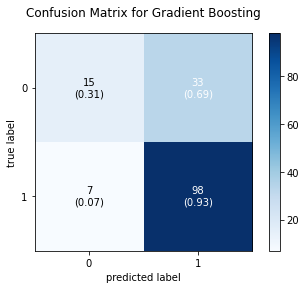

In [0]:
#Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=matrix_gdb, show_absolute=True,show_normed=True, colorbar=True)
ax.set_title('Confusion Matrix for Gradient Boosting');
plt.show()

##<font color='purple'>9.3 Plotting Importance Feature</font>

---
Importance Feature ที่มีผลต่อ Base Data จากมากไปน้อย 5 ลำดับดังนี้

  1. Credit_History 
  2. LoanAmount 
  3. ApplicantIncome 
  4. CoapplicantIncome
  5. Loan_Amount_Term



In [0]:
#Feature Importance
print(mymodel_gdb.feature_importances_)


[0.00421325 0.00784753 0.00919429 0.00293791 0.00159101 0.15438169
 0.09873108 0.1619981  0.04495843 0.48103516 0.03311155]


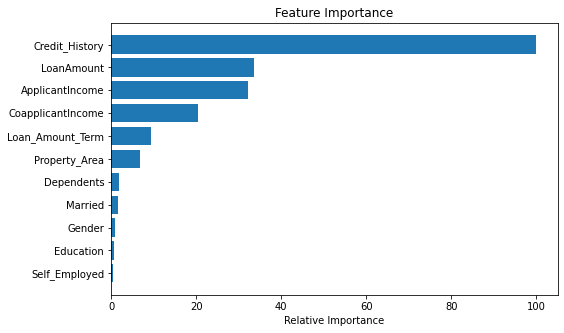

In [0]:
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
feature_importance = mymodel_gdb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8, 5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

# <font color='green'>**10. Hyper-Parameter Optimization**
</font>

*   Grid Search : รันโมเดลทุกๆค่าของแต่ละ hpyerparameters ที่เรากำหนดไว้
*   Random Search : รันโมเดลแบบสุ่มค่าของแต่ละพารามิเตอร์ที่เรากำหนดไว้แบบข้างบน ทำให้ effort time น้อยลง เมื่อใช้กับข้อมูลเยอะมาก (n_estimators)



##<font color='purple'>10.1 GridSearchCV with Gredient Boosting Classifier</font>

---

In [0]:
#See defalut hyperparameter
print(GradientBoostingClassifier())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [0]:
#Choose the best Hyperparameters learning_rate, max_depth and the n_estimators.
gdb = GradientBoostingClassifier()
grid_param = {
    "n_estimators":[5,50,100,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01, 0.5, 0.1, 1, 10]
}

In [0]:
#Use the GridSearhCV() for Stratified 5 Fold CV
grid_model_gdb = GridSearchCV(gdb, grid_param, cv=skf, scoring="accuracy")
grid_model_gdb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,...
                                                  n_iter_no_change=None,
                                                  presort='deprecated',
          

In [0]:
#Find Best Parameter for Optimized GBM
grid_model_gdb.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [0]:
#Finding how best model fits the data
grid_model_gdb.score(X_train, y_train)

0.8231441048034934

In [0]:
#Build model with the best parameters
tune_gdb = GradientBoostingClassifier(**grid_model_gdb.best_params_)
tune_gdb.fit(X_train, y_train)
y_pred = tune_gdb.predict(X_test)
print('GridSearchCV - Accuracy Score:', accuracy_score(y_test, y_pred))

GridSearchCV - Accuracy Score: 0.7647058823529411


Accuracy of the GBM on test set: 0.765
              precision    recall  f1-score   support

           0       0.83      0.31      0.45        48
           1       0.76      0.97      0.85       105

    accuracy                           0.76       153
   macro avg       0.79      0.64      0.65       153
weighted avg       0.78      0.76      0.73       153



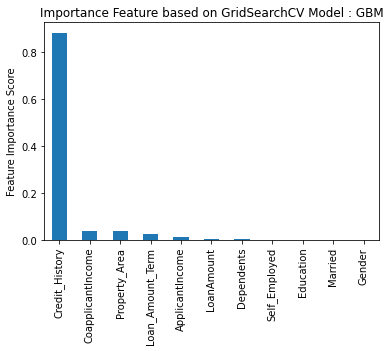

In [0]:
predictors=list(X_train)
feat_imp = pd.Series(tune_gdb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance Feature based on GridSearchCV Model : GBM')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(tune_gdb.score(X_test, y_test)))
pred=tune_gdb.predict(X_test)
print(classification_report(y_test, pred))

In [0]:
y_pred = mymodel_gdb.predict(X_test)
print('Base Model ==> Gradient Boosting Accuracy Score:', accuracy_score(y_test, y_pred))

Base Model ==> Gradient Boosting Accuracy Score: 0.738562091503268


##<font color='purple'>10.2 RandomizedSearchCV with Gredient Boosting Classifier</font>

---

In [0]:
random_param = { 
    "n_estimators":[100,200,300,400,500,600,700,800,900,1000],
    "max_depth":[1,3,5,7,9], 
    "learning_rate":[0.01, 0.05, 0.1, 0.5, 1, 10], 
    "min_samples_split":[2,4,6,8,10], 
    "min_samples_leaf":[1,3,5,7,9] }

In [0]:
random_model_gdb = RandomizedSearchCV(gdb, random_param, cv=skf, scoring="accuracy")
random_model_gdb.fit(X_train, y_train)
print(random_model_gdb.best_params_)
print(random_model_gdb.score(X_train, y_train))

{'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 1, 'learning_rate': 0.05}
0.8275109170305677


In [0]:
#Build model with the best parameters
random_tune_gdb = GradientBoostingClassifier(**random_model_gdb.best_params_)
random_tune_gdb.fit(X_train, y_train)
y_pred = random_tune_gdb.predict(X_test)
print('RandomizedSearchCV - Accuracy Score:', accuracy_score(y_test, y_pred))

RandomizedSearchCV - Accuracy Score: 0.7712418300653595


Accuracy of the GBM on test set: 0.771
              precision    recall  f1-score   support

           0       0.88      0.31      0.46        48
           1       0.76      0.98      0.85       105

    accuracy                           0.77       153
   macro avg       0.82      0.65      0.66       153
weighted avg       0.80      0.77      0.73       153



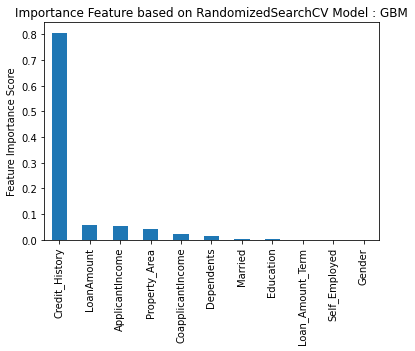

In [0]:
predictors=list(X_train)
feat_imp = pd.Series(random_tune_gdb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance Feature based on RandomizedSearchCV Model : GBM')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(random_tune_gdb.score(X_test, y_test)))
pred=random_tune_gdb.predict(X_test)
print(classification_report(y_test, pred))

##<font color='purple'>10.3 Comparision of ROC AUC </font>

---

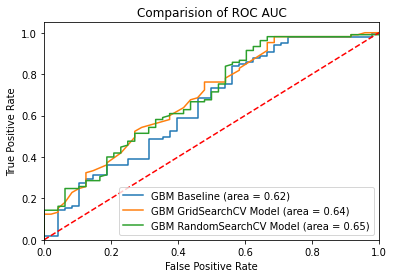

In [0]:
#calculate values for ROC AUC plot
#Base Model
baseline_roc_auc = roc_auc_score(y_test, mymodel_gdb.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, mymodel_gdb.predict_proba(X_test)[:,1])
#GridSearchCV Model
model1_roc_auc = roc_auc_score(y_test, grid_model_gdb.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, grid_model_gdb.predict_proba(X_test)[:,1])
#RandomSearchCV Model
new_roc_auc = roc_auc_score(y_test, random_model_gdb.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, random_model_gdb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM GridSearchCV Model (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM RandomSearchCV Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparision of ROC AUC')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# <font color = 'blue'> **11. Conclusion**
From the experience that have submitted with the solution check more than 600 times, summarized as follows;</font>


1. This data is binary classification problem 
2. Train Dataset : 614 rows and 13 columns, 
3. Test Dataset : 367 rows and 12 columns (wihtout target attribute 'Loan_Status')
4. This imbalanced data is a mild degree. Majority Class 69%, Minority Class 31%
5. There are 149 missing values for train dataset, and 84 missing values for test dataset which both wil be imputed with mean() and mode(), then double check to make sure that there is no missing values (make both train and test file)
    *   mode() : Credit_History, CoapplicantIncome, ApplicantIncome, Self_Employed, Gender, Dependents, Loan_Amount_Term
    *   mean() : LoanAmount
6. EDA with Loan Status

  หากผู้กู้มีลักษณะดังนี้ ข้อใดข้อหนึ่ง มักจะมีโอกาสได้รับอนุมัติสินเชื่อเงินกู้สูง
      * ประวัติเครดิตดี (Good Credit History)
      * ไม่เป็นอาชีพอิสระ (Not Self-employed)
      * จบการศึกษา (Graduated)
      * ไม่มีบุตร (No dependents)
      * แต่งงานแล้ว (Married)
      * เพศชาย (Male)

7. EDA with Applicant Income
  เมื่อวิเคราะห์ข้อมูลโดยภาพรวมแล้ว ได้เห็นว่า
  * ผู้ชายที่แต่งงานแล้ว
  * ผู้ชายที่จบการศึกษา
  * ผู้ชายที่ไม่ได้ทำงานประกอบอาชีพอิสระ
  
  ซึ่งกลุ่มพวกนี้มักจะมีรายได้สูง

8. The most correlated feature from HeapMap after treatment

  *   Application Income - Loan Amount 0.6
  *   Credit History - Loan Status 0.54
  *   Gender - Married : 0.36
  *   Dependents - Married : 0.34

9. Feature Engineer with encoding to numberic data for columns : Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status (make both train and test file)

10. Use Stratified split into train 75% and test 25% from train file with random_state=0 and random_state=1000 to be compared in terms for the performance.




  * Evaluation Metrics along with submission for random_state=0

  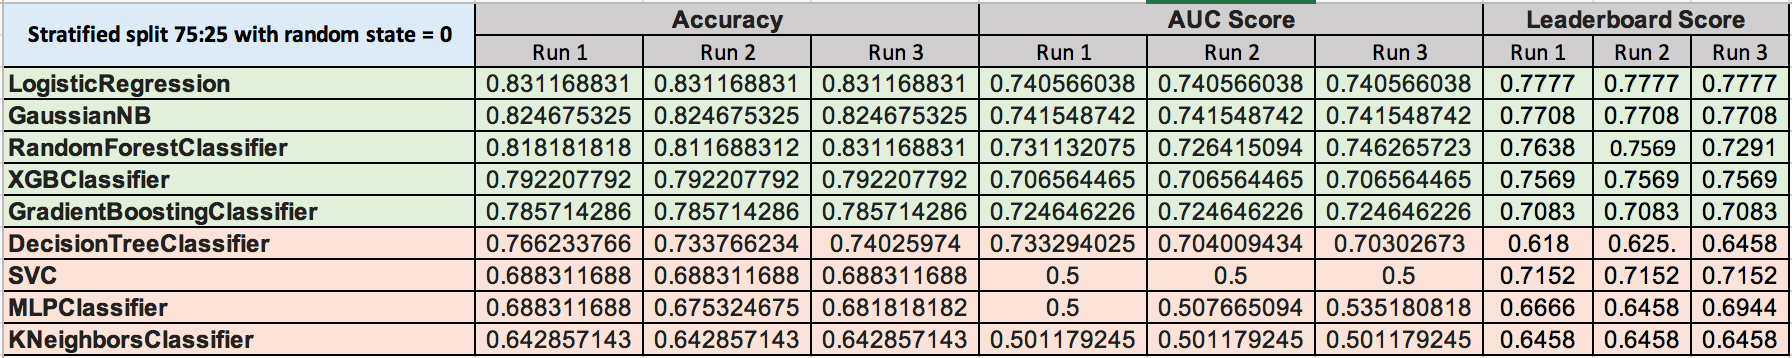

* Evaluation Metrics along with submission for random_state=1000

  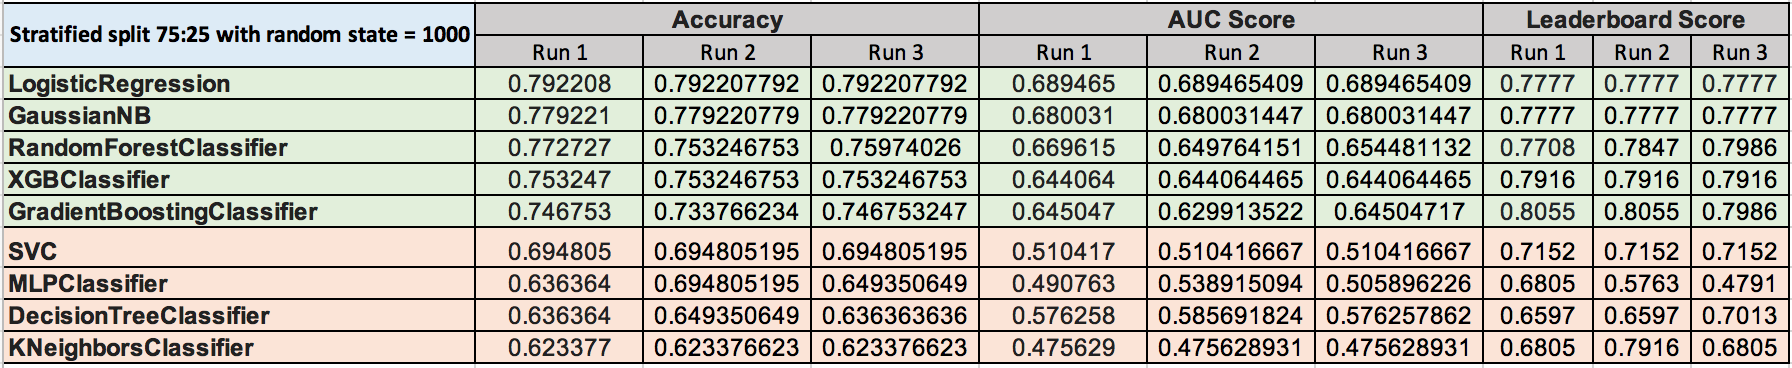

เมื่อพิจารณาการเปรียบเทียบระหว่าง ค่า 0 และ 1000 ของ randome_state โดยดูภาพรวมทุกโมเดล ได้เห็นว่า random_state=1000 ทำให้ Accuracy และ AUC Score ลดลง แต่ Leaderboard Score กลับทำให้เยอะขึ้น ซึ่งแปลว่าหากเราตั้ง random_state=1000 จะมีโอกาสตรงคำตอบเฉลยมากกว่า ฉะนั้นจะใช้ randome_state=1000 เป็น **Base Split** และจะโฟกัส algorithm แถบสีเขียวมากขึ้น [LogisticRegression,Naive Bayes, Random Forest, XGBoosting, Gradien Boosting]

**Base Split = Stratified split 75:25 with random state = 1000**

11. EDA with Noisy Data : จาก Boxplot จะเห็นว่ามี outlier เยอะ ซึ่งล้วนเป็น Important Data ทั้งนั้น ลองตัดแต่ละครั้งแล้ว ก็ไม่ได้ทำให้ Leaderboard Score ดีขึ้น ฉะนั้นลองใช้ด้วยวิธี Outlier Observation

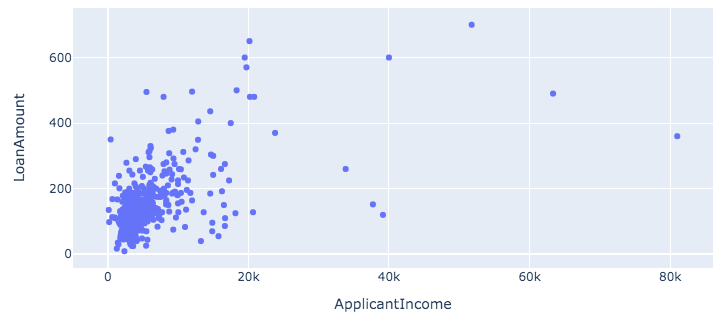

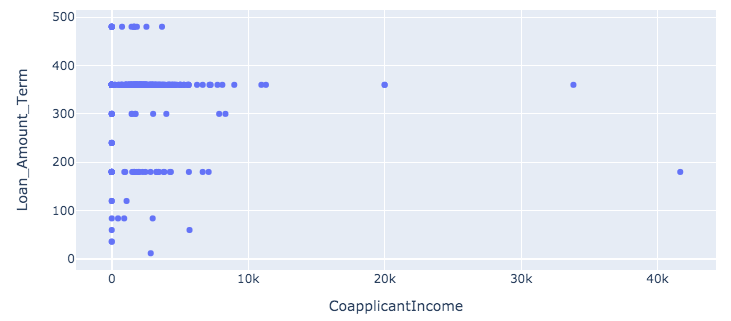

* Base Split + Remove ApplicantIncome > 50000

  ลองตัด outlier ของ ApplicantIncome มากกว่า 50000 ซึ่งมี 3 ตัว ทำให้ Leaderboard Score เพิ่มขึ้นเป็น 0.8125 สำหรับ GBM ( run 5 times, get 0.8125 => 5/5) เลยทำให้โฟกัสกับ Gredient Boosting มากสุด

  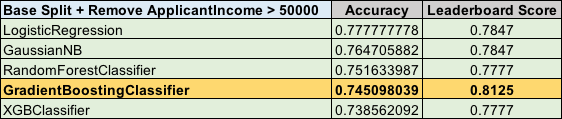

* Base Split + Remove ApplicantIncome > 60000

  ลองตัด outlier ของ ApplicantIncome มากกว่า 60000 ซึ่งมี 2 ตัว ทำให้ Accuracy ลดลงเล็กน้อยจาก 0.745 เหลือ 0.738 แต่กลับทำให้ Leaderboard Score มีโอกาสเพิ่มขึ้นเป็น 0.8194 สำหรับ GBM ( run 5 times, get 0.8125 => 4/5, get 0.8055 => 1/5)

  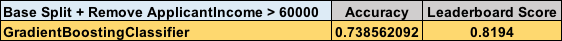

* Base Split + Remove ApplicantIncome > 60000 + Remove CoapplicantIncome > 40000

  ลองตัด outlier ของ ApplicantIncome มากกว่า 60000 และ CoapplicantIncome > 40000 ซึ่งรวมกันแล้วมี 3 ตัว ทำให้ Leaderboard Score มีโอกาสเพิ่มขึ้นเป็น 0.8263 สำหรับ GBM ( run 10 times, get 0.8263 => 8/10, get 0.8194 => 2/10)

  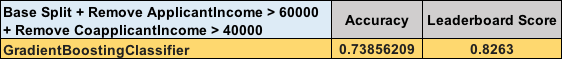

Therefore, **My Base Data** = Stratified split into train data 75% and test data 25% with random state=1000, and remove the outlier data 3 points. This base data can make the leaderboard score up to 0.826
  
  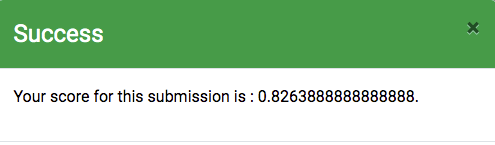


12. Comparing the predictive performance from **BASE DATA**
  
  **Base Model** ดีสุด 5 อันดับตามลำดับได้แก่ 1. Naive Bayes 2. LogisticRegresssion 3. RandomForest 4. GBM 5. XGBoost
  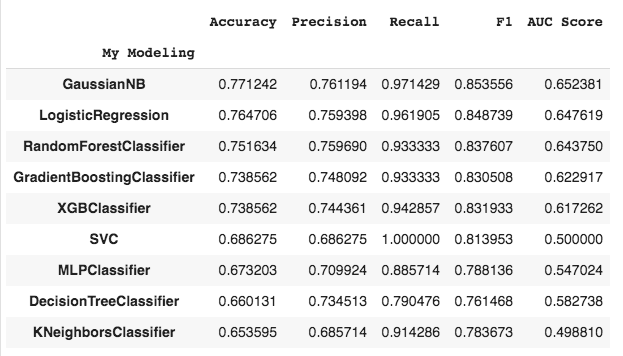

13. Multiple ROC Curves Analytics : AUC used by auc(fpr, tpr) with predict_proba & Stratified K-Fold CV

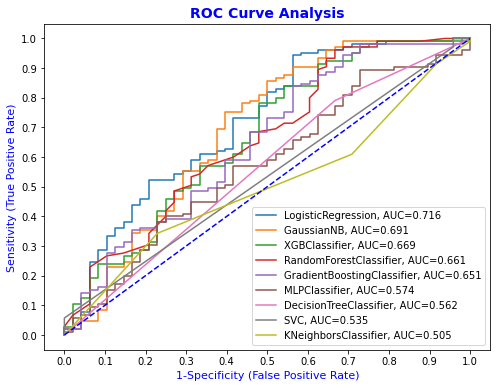

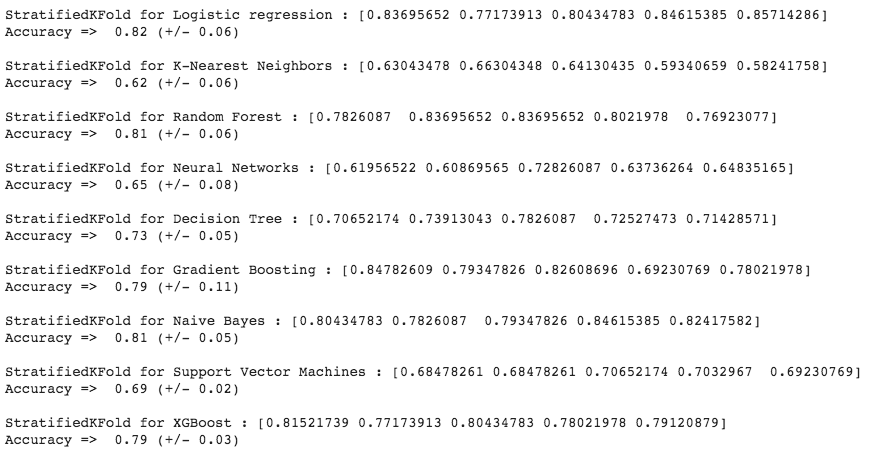

14. Try Resampling Imbalanced Data. (F1,AUC Score)
  
  เมื่อทำการ resampling ทั้ง upsample และ Downsample แล้ว ได้เห็นว่า
  
  * Upsample Minority Class : บางโมเดลส่วนใหญ่มีการทำนายดีขึ้น เช่น SVC, Random Forest, Decision Tree, GBM, XGB ส่วนที่เหลือแย่ลง
  * Downsample Majority Class : ส่วนมากโมเดลกลับมีการทำนายแย่ลงทั้งหมด ยกเว้น LogisticRegression

  ฉะนั้น ส่วนนี้จะไม่ใช้งานกับข้อมูล Base Data เพราะ the leaderboard score ไม่ได้ดีขึ้นเลยสักครั้ง

  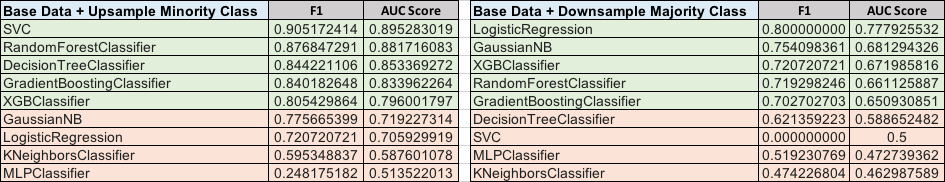

15. Try Scaling data.
  เมื่อทำการ scaling data ด้วย MinMaxScaler, StandardScaler และ RobustScaler แล้ว ได้เห็นว่า
  * Best Classifier with MinMaxScaler คือ LogisticRegression และ SVC
  * Best Classifier with StnadardScaler คือ SVC
  * Best Classifier with RobustScaler คือ LogisticRegression

  แต่น่าเสียดาย Scaling Data จะไม่ถูกใช้งานกับ Base Data นี้ เนื่องจากไม่ได้ทำให้ leaderboard score ดีขึ้นเลย กลับทำให้แย่ลงด้วย 

  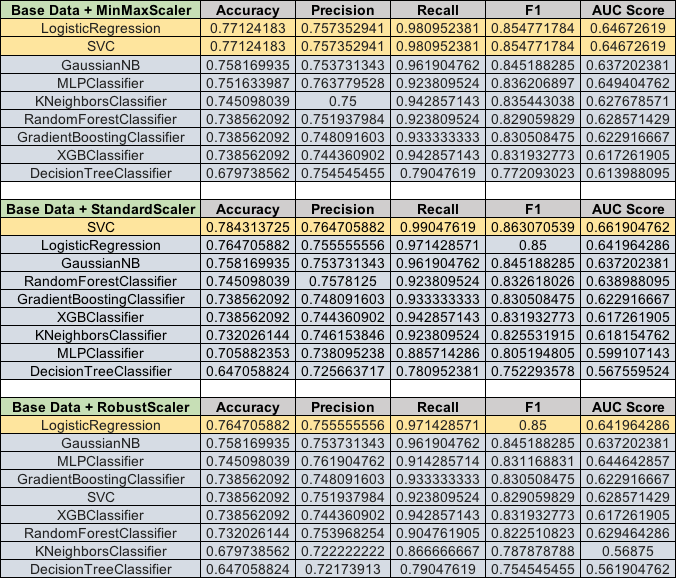

16. Baseline Model for the submission is **Gredient Boosting**
* Accuracy = 73.8562091503268 %
* Precision = 74.80916030534351 %
* Recall = 93.33333333333333 %
* f1 = 83.05084745762711 %

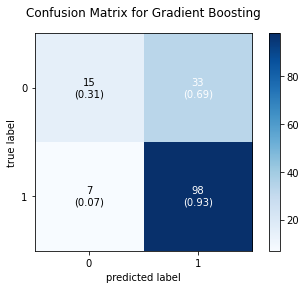

  Importance Feature ที่มีผลต่อ Base Data จากมากไปน้อย 5 ลำดับดังนี้ 
1. Credit_History 2. LoanAmount 3. ApplicantIncome 4. CoapplicantIncome 5. Loan_Amount_Term

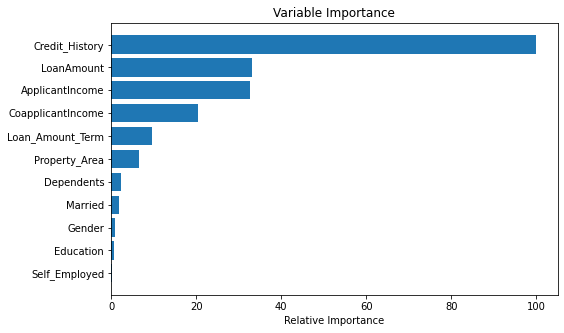

17. **GridSearchCV** with Gredient Boosting Classifier

  **Step 1** : Import GBM and see default hyperparamter
```
from sklearn.ensemble import GradientBoostingClassifier
  print(GradientBoostingClassifier())
```
  **Step 2** : Choose the best Hyperparameters n_estimators, max_depth, learning_rate, 
```
gdb = GradientBoostingClassifier()
grid_param = {
    "n_estimators":[5,50,100,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01, 0.5, 0.1, 1, 10]
}
```
  **Step 3** : Use the RandomizedSearchCV for Stratified 5 Fold CV
```
grid_model_gdb = RandomizedSearchCV(gdb, grid_param, cv=skf, scoring="accuracy")
grid_model_gdb.fit(X_train, y_train)
```

  **Step 4** : Find Best Parameter for Optimized GBM => *{'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}*
```
grid_model_gdb.best_params_
```
  **Step 5** : Find how best model fits the data, and get this score 0.8231 => Good to fits the data
```
grid_model_gdb.score(X_train, y_train)
```
  **Step 6** : Build model with the best parameters, and get Accuracy Score 0.7647. That means tune-fine hyperparameter make Accuracy Score better than Baseline Model(0.7385)
```
tune_gdb = GradientBoostingClassifier(**grid_model_gdb.best_params_)
tune_gdb.fit(X_train, y_train)
y_pred = tune_gdb.predict(X_test)
print('Tune-Fine Model ==> GradientBoosting Accuracy Score:', accuracy_score(y_test, y_pred))
```
  Importance Feature based on GridSerchCV Model 5 อันดับ ตามลำดับได้แก่ Credit_History, CoapplicantIncome, Property_Area, Loan_Amount_Term, ApplicantIncome

  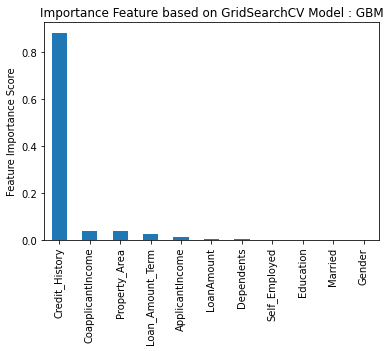







18. **RandomizedSearchCV** with Gredient Boosting Classifier

  Define hypermeter :
```
  random_param = { 
    "n_estimators":[100,200,300,400,500,600,700,800,900,1000],
    "max_depth":[1,3,5,7,9], 
    "learning_rate":[0.01, 0.05, 0.1, 0.5, 1, 10], 
    "min_samples_split":[2,4,6,8,10], 
    "min_samples_leaf":[1,3,5,7,9] }
```
  Best parameter :
  
  `{'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 1, 'learning_rate': 0.05}`

  Accuracy Score : 0.7712

  Importance Feature based on RandomizedSerchCV Model 5 อันดับ ตามลำดับได้แก่ Credit_History, LoanAmount, ApplicantIncome, Property_Area, CoapplicantIncome

  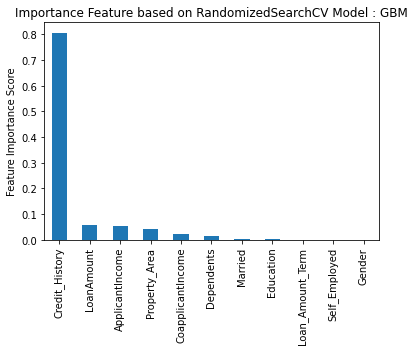


19. Comparison : เมื่อทำการจูนพารามิเตอร์ทั้ง Grid Search และ Random Search แล้วทำให้การทำนายโมเดลดีกว่า Baseline Model แต่อย่างไรก็ตาม ก็ทำให้ Leaderboard Score ลดลง นั่นคือผลลัพธ์ของโมเดลเราตรงคำตอบเฉลยน้อยลง

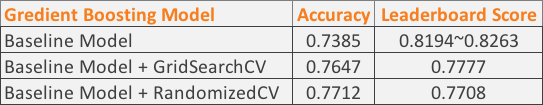

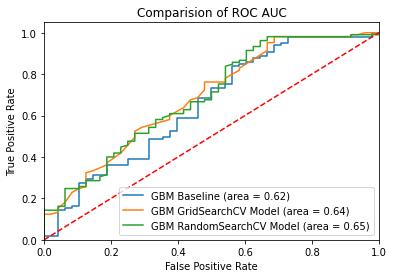

# <font color = 'green'> **12. Deployment**

  หากใช้กับงานที่มีผลเฉลย (ที่เราทำอยู่ มี solution checker) เราก็จะเลือกโมเดลที่ตอบสนองให้กับ Leaderboard Score ให้มากสุดเท่าที่ทำได้ นั่นคือ Baseline GBM

  แต่อย่างไรก็ตาม เมื่อนำไปใช้งานจริงที่ไม่มีผลเฉลย เราก็จะเลือกโมเดลที่มีความแม่นยำสูงๆ ตามความเหมาะสม
เช่น Baseline SVC Model + Upsample Minority Class [ AUC= 0.89 ] หรือ Baseline RandomForest Model + Upsample Minority Class [ AUC= 0.88 ] เป็นต้น